In [1]:
import tensorflow as tf
import numpy as np
import mlp.tf_utils as utils
from mlp.data_providers import AugmentedCIFAR10DataProvider, AugmentedCIFAR100DataProvider, CIFAR100DataProvider, CIFAR10DataProvider
from mlp.image_transforms import random_flip, random_crop, center_crop, random_flip_small
from mlp.Conv_models import ConvModel, TwoTaskConvModel, TwoTaskConvModelSoftSharing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

seed = 12345 
rng = np.random.RandomState(seed)

In [2]:
#### event file dirs #####

baseline_CIFAR_100_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/baseline_with_1.0_of_the_data/2017-06-26_15-57-29/train/events.out.tfevents.1498489049.ben-desktop"
baseline_CIFAR_100_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/baseline_with_1.0_of_the_data/2017-06-26_15-57-29/valid/events.out.tfevents.1498489049.ben-desktop"

mtl_bif_3_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_3/2017-06-23_14-28-44/train/events.out.tfevents.1498224524.ben-desktop"
mtl_bif_3_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_3/2017-06-23_14-28-44/valid/events.out.tfevents.1498224525.ben-desktop"
mtl_bif_3_dir_other = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_3/2017-06-23_14-28-44/other/events.out.tfevents.1498224525.ben-desktop"

mtl_bif_2_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_00-20-19/train/events.out.tfevents.1498173620.ben-desktop"
mtl_bif_2_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_00-20-19/valid/events.out.tfevents.1498173620.ben-desktop"
mtl_bif_2_dir_other = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/soft_parameter_sharing/tf-log/MTL_soft_with_1.0_of_the_data/2017-06-23_00-20-19/other/events.out.tfevents.1498173620.ben-desktop"

mtl_bif_1_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_1/2017-06-23_13-35-27/train/events.out.tfevents.1498221327.ben-desktop"
mtl_bif_1_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_1/2017-06-23_13-35-27/valid/events.out.tfevents.1498221327.ben-desktop"
mtl_bif_1_dir_other = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_1/2017-06-23_13-35-27/other/events.out.tfevents.1498221328.ben-desktop"

mtl_bif_4_dir_train = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_4/2017-06-23_15-22-02/train/events.out.tfevents.1498227722.ben-desktop"
mtl_bif_4_dir_valid = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_4/2017-06-23_15-22-02/valid/events.out.tfevents.1498227722.ben-desktop"
mtl_bif_4_dir_other = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_4/2017-06-23_15-22-02/other/events.out.tfevents.1498227723.ben-desktop"

In [3]:
print("############# BASELINE_CIFAR_100_TRAIN ###########")
print("")
print("")
baseline_CIFAR_100_stats_train = utils.event_file_to_stats_dict(baseline_CIFAR_100_dir_train)
print("ACCURACIES")
baseline_CIFAR_100_acc_train = utils.only_stats_with_keyword(baseline_CIFAR_100_stats_train, "accuracy")
print(baseline_CIFAR_100_acc_train.keys())
print("")
print("ERRORS")
baseline_CIFAR_100_error_train = utils.only_stats_with_keyword(baseline_CIFAR_100_stats_train, "error")
print(baseline_CIFAR_100_error_train.keys())
print("")
print("")

print("####### BASELINE_CIFAR_100_VALID ##########")
print("")
print("")
baseline_CIFAR_100_stats_valid = utils.event_file_to_stats_dict(baseline_CIFAR_100_dir_valid)
print("ACCURACIES")
baseline_CIFAR_100_acc_valid = utils.only_stats_with_keyword(baseline_CIFAR_100_stats_valid, "accuracy")
print(baseline_CIFAR_100_acc_valid.keys())
print("")
print("ERRORS")
baseline_CIFAR_100_error_valid = utils.only_stats_with_keyword(baseline_CIFAR_100_stats_valid, "error")
print(baseline_CIFAR_100_error_valid.keys())
print("")
print("")

print("####### MTL_BIF_1_TRAIN ##########")
print("")
print("")
mtl_bif_1_stats_train = utils.event_file_to_stats_dict(mtl_bif_1_dir_train)
print("ACCURACIES")
mtl_bif_1_acc_train = utils.only_stats_with_keyword(mtl_bif_1_stats_train, "accuracy")
print(mtl_bif_1_acc_train.keys())
print("")
print("ERRORS")
mtl_bif_1_error_train = utils.only_stats_with_keyword(mtl_bif_1_stats_train, "error")
print(mtl_bif_1_error_train.keys())
print("")
print("")

print("####### MTL_BIF_1_VALID ##########")
print("")
print("")
mtl_bif_1_stats_valid = utils.event_file_to_stats_dict(mtl_bif_1_dir_valid)
print("ACCURACIES")
mtl_bif_1_acc_valid = utils.only_stats_with_keyword(mtl_bif_1_stats_valid, "accuracy")
print(mtl_bif_1_acc_valid.keys())
print("")
print("ERRORS")
mtl_bif_1_error_valid = utils.only_stats_with_keyword(mtl_bif_1_stats_valid, "error")
print(mtl_bif_1_error_valid.keys())
print("")
print("")

print("########## MTL_BIF_1_OTHER ##############")
print("")
print("")
mtl_bif_1_stats_other = utils.event_file_to_stats_dict(mtl_bif_1_dir_other)
print("WEIGHTS DIFF")
mtl_bif_1_diff = utils.only_stats_with_keyword(mtl_bif_1_stats_other, "diff")
print(mtl_bif_1_diff.keys())
print("")
print("")

print("####### MTL_BIF_2_TRAIN ##########")
print("")
print("")
mtl_bif_2_stats_train = utils.event_file_to_stats_dict(mtl_bif_2_dir_train)
print("ACCURACIES")
mtl_bif_2_acc_train = utils.only_stats_with_keyword(mtl_bif_2_stats_train, "accuracy")
print(mtl_bif_2_acc_train.keys())
print("")
print("ERRORS")
mtl_bif_2_error_train = utils.only_stats_with_keyword(mtl_bif_2_stats_train, "error")
print(mtl_bif_2_error_train.keys())
print("")
print("")

print("####### MTL_BIF_2_VALID ##########")
print("")
print("")
mtl_bif_2_stats_valid = utils.event_file_to_stats_dict(mtl_bif_2_dir_valid)
print("ACCURACIES")
mtl_bif_2_acc_valid = utils.only_stats_with_keyword(mtl_bif_2_stats_valid, "accuracy")
print(mtl_bif_2_acc_valid.keys())
print("")
print("ERRORS")
mtl_bif_2_error_valid = utils.only_stats_with_keyword(mtl_bif_2_stats_valid, "error")
print(mtl_bif_2_error_valid.keys())
print("")
print("")

print("########## MTL_BIF_2_OTHER ##############")
print("")
print("")
mtl_bif_2_stats_other = utils.event_file_to_stats_dict(mtl_bif_2_dir_other)
print("WEIGHTS DIFF")
mtl_bif_2_diff = utils.only_stats_with_keyword(mtl_bif_2_stats_other, "diff")
print(mtl_bif_2_diff.keys())
print("")
print("")

print("####### MTL_BIF_3_TRAIN ##########")
print("")
print("")
mtl_bif_3_stats_train = utils.event_file_to_stats_dict(mtl_bif_3_dir_train)
print("ACCURACIES")
mtl_bif_3_acc_train = utils.only_stats_with_keyword(mtl_bif_3_stats_train, "accuracy")
print(mtl_bif_3_acc_train.keys())
print("")
print("ERRORS")
mtl_bif_3_error_train = utils.only_stats_with_keyword(mtl_bif_3_stats_train, "error")
print(mtl_bif_3_error_train.keys())
print("")
print("")

print("####### MTL_BIF_3_VALID ##########")
print("")
print("")
mtl_bif_3_stats_valid = utils.event_file_to_stats_dict(mtl_bif_3_dir_valid)
print("ACCURACIES")
mtl_bif_3_acc_valid = utils.only_stats_with_keyword(mtl_bif_3_stats_valid, "accuracy")
print(mtl_bif_3_acc_valid.keys())
print("")
print("ERRORS")
mtl_bif_3_error_valid = utils.only_stats_with_keyword(mtl_bif_3_stats_valid, "error")
print(mtl_bif_3_error_valid.keys())
print("")
print("")

print("########## MTL_BIF_3_OTHER ##############")
print("")
print("")
mtl_bif_3_stats_other = utils.event_file_to_stats_dict(mtl_bif_3_dir_other)
print("WEIGHTS DIFF")
mtl_bif_3_diff = utils.only_stats_with_keyword(mtl_bif_3_stats_other, "diff")
print(mtl_bif_3_diff.keys())
print("")
print("")

print("####### MTL_BIF_4_TRAIN ##########")
print("")
print("")
mtl_bif_4_stats_train = utils.event_file_to_stats_dict(mtl_bif_4_dir_train)
print("ACCURACIES")
mtl_bif_4_acc_train = utils.only_stats_with_keyword(mtl_bif_4_stats_train, "accuracy")
print(mtl_bif_4_acc_train.keys())
print("")
print("ERRORS")
mtl_bif_4_error_train = utils.only_stats_with_keyword(mtl_bif_4_stats_train, "error")
print(mtl_bif_4_error_train.keys())
print("")
print("")

print("####### MTL_BIF_4_VALID ##########")
print("")
print("")
mtl_bif_4_stats_valid = utils.event_file_to_stats_dict(mtl_bif_4_dir_valid)
print("ACCURACIES")
mtl_bif_4_acc_valid = utils.only_stats_with_keyword(mtl_bif_4_stats_valid, "accuracy")
print(mtl_bif_4_acc_valid.keys())
print("")
print("ERRORS")
mtl_bif_4_error_valid = utils.only_stats_with_keyword(mtl_bif_4_stats_valid, "error")
print(mtl_bif_4_error_valid.keys())
print("")
print("")

print("########## MTL_BIF_4_OTHER ##############")
print("")
print("")
mtl_bif_4_stats_other = utils.event_file_to_stats_dict(mtl_bif_4_dir_other)
print("WEIGHTS DIFF")
mtl_bif_4_diff = utils.only_stats_with_keyword(mtl_bif_4_stats_other, "diff")
print(mtl_bif_4_diff.keys())
print("")
print("")

############# BASELINE_CIFAR_100_TRAIN ###########


ACCURACIES
['baseline_with_1.0_of_the_data_accuracy']

ERRORS
['baseline_with_1.0_of_the_data_l2_error', 'baseline_with_1.0_of_the_data_total_error', 'baseline_with_1.0_of_the_data_soft_max_cross_entropy_error']


####### BASELINE_CIFAR_100_VALID ##########


ACCURACIES
['baseline_with_1.0_of_the_data_accuracy']

ERRORS
['baseline_with_1.0_of_the_data_l2_error', 'baseline_with_1.0_of_the_data_total_error', 'baseline_with_1.0_of_the_data_soft_max_cross_entropy_error']


####### MTL_BIF_1_TRAIN ##########


ACCURACIES
['MTL_soft_with_1.0_of_the_data_and_bif_1_main_accuracy', 'MTL_soft_with_1.0_of_the_data_and_bif_1_aux_accuracy']

ERRORS
['MTL_soft_with_1.0_of_the_data_and_bif_1_aux_error', 'MTL_soft_with_1.0_of_the_data_and_bif_1_main_error']


####### MTL_BIF_1_VALID ##########


ACCURACIES
['MTL_soft_with_1.0_of_the_data_and_bif_1_main_accuracy', 'MTL_soft_with_1.0_of_the_data_and_bif_1_aux_accuracy']

ERRORS
['MTL_soft_with_1.0_of_

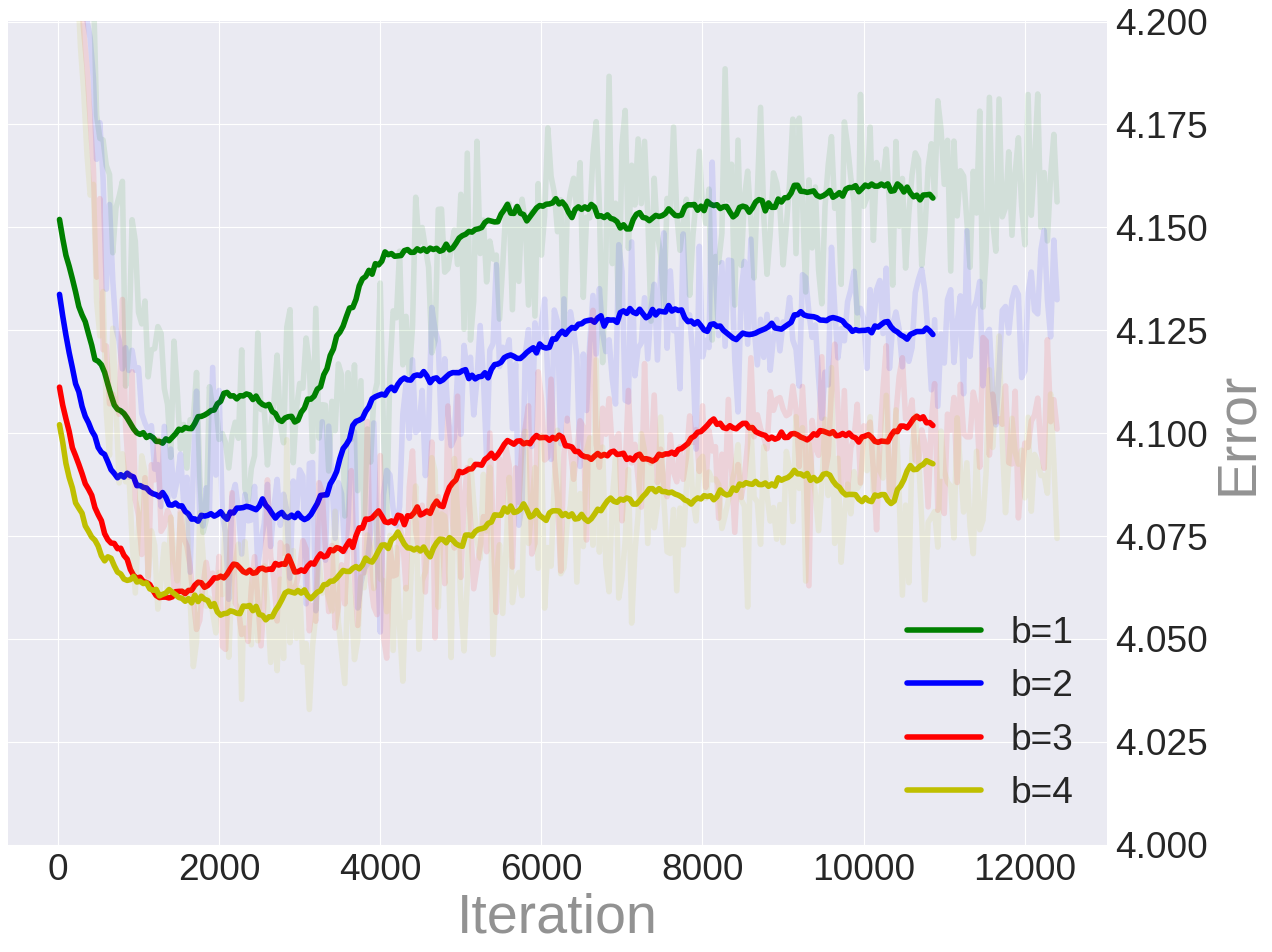

In [44]:
smooth_distance = 20
alpha = 0.1
line_width = 5.0
size=50

plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title("", size=size)
plt.xlabel("Iteration", size=size,alpha=0.5)

############ Baseline CIFAR 100 ################
lbl = "STL"

y = np.array(baseline_CIFAR_100_error_valid['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(baseline_CIFAR_100_error_valid['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, label=lbl, linewidth=line_width)


############# MTL bif 1 #################
lbl = "b=1"

y = np.array(mtl_bif_1_error_valid['MTL_soft_with_1.0_of_the_data_and_bif_1_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='g')

y = np.array(mtl_bif_1_error_valid['MTL_soft_with_1.0_of_the_data_and_bif_1_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='g')

############# MTL bif 2 #################
lbl = "b=2"

y = np.array(mtl_bif_2_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='b')

y = np.array(mtl_bif_2_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='b')

############# MTL bif 3 #################
lbl = "b=3"

y = np.array(mtl_bif_3_error_valid['MTL_soft_with_1.0_of_the_data_and_bif_3_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='r')

y = np.array(mtl_bif_3_error_valid['MTL_soft_with_1.0_of_the_data_and_bif_3_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='r')

############# MTL bif 4 #################
lbl = "b=4"

y = np.array(mtl_bif_4_error_valid['MTL_soft_with_1.0_of_the_data_and_bif_4_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='y')

y = np.array(mtl_bif_4_error_valid['MTL_soft_with_1.0_of_the_data_and_bif_4_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='y')

plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
plt.xticks(size=size/1.5)
plt.yticks(size=size/1.5)
plt.axis(ymax=4.2, ymin=4)
ax = plt.gca()
ax.set_ylabel("Error", size=size, alpha=0.5)
ax.yaxis.set_label_position("right")
plt.legend(loc="best",prop={'size':size/1.5})
plt.tight_layout()
plt.savefig("valid_error_bifs.png", dpi=100)
plt.show()

In [5]:
print("STL:\t{}".format(min(baseline_CIFAR_100_error_valid['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])))
print("1:\t{}".format(min(mtl_bif_1_error_valid['MTL_soft_with_1.0_of_the_data_and_bif_1_main_error'])))
print("2:\t{}".format(min(mtl_bif_2_error_valid['MTL_soft_with_1.0_of_the_data_main_error'])))
print("3:\t{}".format(min(mtl_bif_3_error_valid['MTL_soft_with_1.0_of_the_data_and_bif_3_main_error'])))
print("4:\t{}".format(min(mtl_bif_4_error_valid['MTL_soft_with_1.0_of_the_data_and_bif_4_main_error'])))

STL:	3.98109173775
1:	4.07588005066
2:	4.05169296265
3:	4.04535245895
4:	4.0328836441


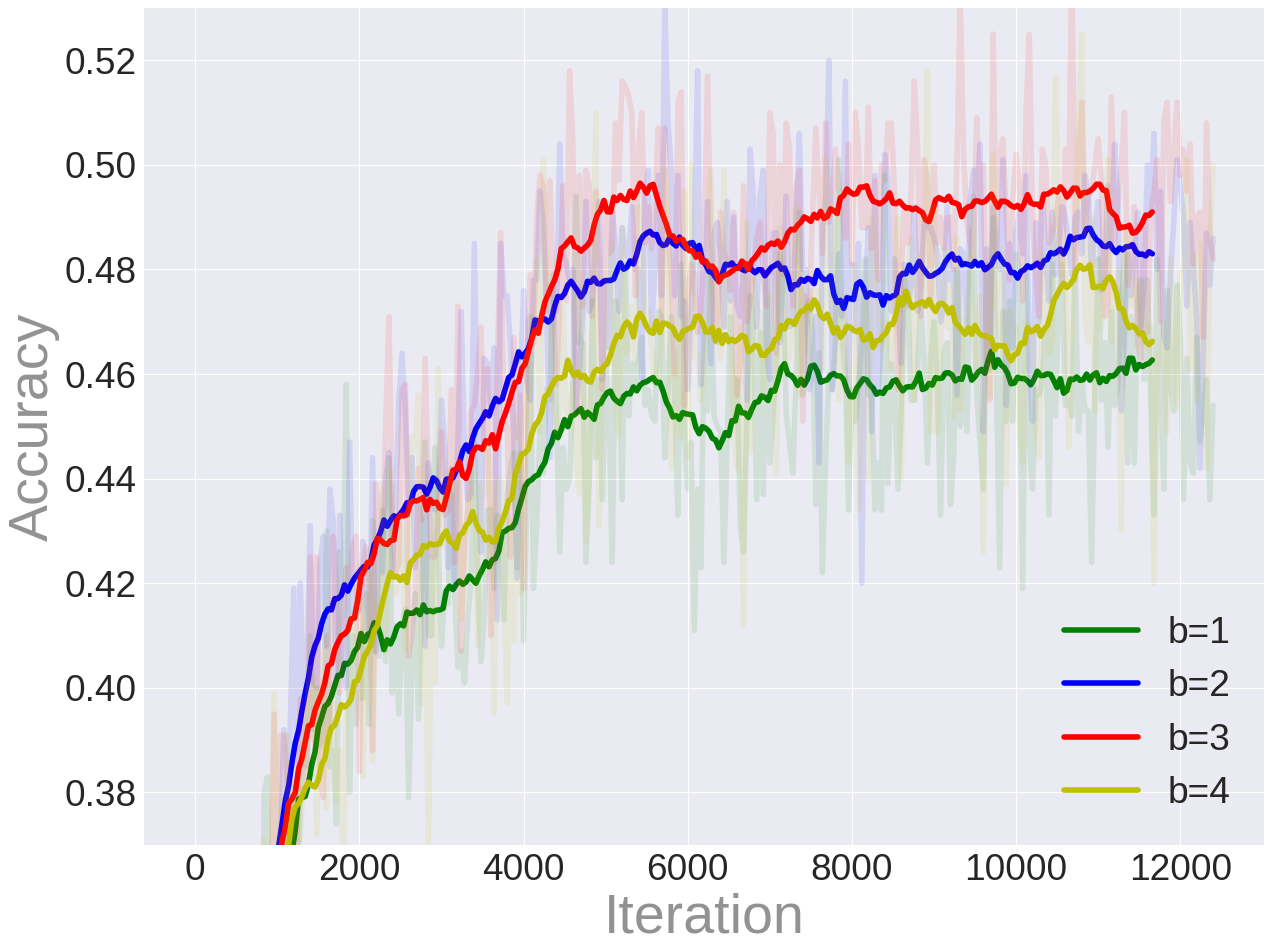

In [46]:
smooth_distance = 20
alpha = 0.1
line_width = 5.0
size=50

plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title("", size=size)
plt.ylabel("Accuracy", size=size, alpha=0.5)
plt.xlabel("Iteration", size=size,alpha=0.5)

############ Baseline CIFAR 100 ################
lbl = "STL"

y = np.array(baseline_CIFAR_100_acc_valid['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(baseline_CIFAR_100_acc_valid['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, label=lbl, linewidth=line_width)


############# MTL bif 1 #################
lbl = "b=1"

y = np.array(mtl_bif_1_acc_valid['MTL_soft_with_1.0_of_the_data_and_bif_1_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='g')

y = np.array(mtl_bif_1_acc_valid['MTL_soft_with_1.0_of_the_data_and_bif_1_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='g')

############# MTL bif 2 #################
lbl = "b=2"

y = np.array(mtl_bif_2_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='b')

y = np.array(mtl_bif_2_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='b')

############# MTL bif 3 #################
lbl = "b=3"

y = np.array(mtl_bif_3_acc_valid['MTL_soft_with_1.0_of_the_data_and_bif_3_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='r')

y = np.array(mtl_bif_3_acc_valid['MTL_soft_with_1.0_of_the_data_and_bif_3_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='r')

############# MTL bif 4 #################
lbl = "b=4"

y = np.array(mtl_bif_4_acc_valid['MTL_soft_with_1.0_of_the_data_and_bif_4_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='y')

y = np.array(mtl_bif_4_acc_valid['MTL_soft_with_1.0_of_the_data_and_bif_4_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width, color='y')

plt.xticks(size=size/1.5)
plt.yticks(size=size/1.5)
plt.axis(ymax=0.53, ymin=0.37)
plt.legend(loc=4,prop={'size':size/1.5})
plt.tight_layout()
plt.savefig("valid_acc_bifs.png", dpi=100)
plt.show()

In [7]:
print("STL:\t{}".format(max(baseline_CIFAR_100_acc_valid['baseline_with_1.0_of_the_data_accuracy'])))
print("1:\t{}".format(max(mtl_bif_1_acc_valid['MTL_soft_with_1.0_of_the_data_and_bif_1_main_accuracy'])))
print("2:\t{}".format(max(mtl_bif_2_acc_valid['MTL_soft_with_1.0_of_the_data_main_accuracy'])))
print("3:\t{}".format(max(mtl_bif_3_acc_valid['MTL_soft_with_1.0_of_the_data_and_bif_3_main_accuracy'])))
print("4:\t{}".format(max(mtl_bif_4_acc_valid['MTL_soft_with_1.0_of_the_data_and_bif_4_main_accuracy'])))

STL:	0.469999969006
1:	0.50100004673
2:	0.530000030994
3:	0.538999974728
4:	0.524999976158
